In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading an Excel file into a pandas DataFrame
df = pd.read_csv('H:\\ΠΑΝΕΠΙΣΤΗΜΙΟ\\ΕΞΑΜΗΝΑ\\3ο_ΕΤΟΣ\\ΠΕΜΠΤΟ_ΕΞΑΜΗΝΟ\\ΣΤΑΤΙΣΤΙΚΗ ΣΤΗΝ ΠΛΗΡΟΦΟΡΙΚΗ\Ασκήσεις\\hw1\data\\video_games_2004-2010.csv')

# Quick Description of the dataset: Where did it come from and how many cases are there?
print("Dataset info: \n Source: https://corgis-edu.github.io/corgis/csv/video_games/\n Downlodeded From: Github.com\n Number of records: ", df.shape[0])
print()
print("See more info about the dataset by clicking this link: https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s")

In [ ]:
# Dropping unnecessary columns
df.drop(columns=['Length.All PlayStyles.Average',
       'Length.All PlayStyles.Leisure', 'Length.All PlayStyles.Median', 'Length.All PlayStyles.Polled', 'Length.All PlayStyles.Rushed',
       'Length.Completionists.Average', 'Length.Completionists.Leisure', 'Length.Completionists.Median', 'Length.Completionists.Polled',
       'Length.Completionists.Rushed', 'Length.Main + Extras.Average', 'Length.Main + Extras.Leisure', 'Length.Main + Extras.Median',
       'Length.Main + Extras.Polled', 'Length.Main + Extras.Rushed', 'Length.Main Story.Average', 'Length.Main Story.Leisure',
       'Length.Main Story.Median', 'Length.Main Story.Polled', 'Length.Main Story.Rushed'], inplace=True)

# Removing rows with missing values for better analysis
df = df.dropna()

In [ ]:
print("The dataset has the following variables:")
print(df.dtypes)

In [ ]:
def plot_var_distr(var, threshold=20, unit=None):

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 5), dpi=200)
    
    # Generate axis label and title with unit, if provided
    xlabel = f"{var} ({unit})" if unit else var
    title = f"Distribution of {var} ({unit})" if unit else f"Distribution of {var}"
    
    # Check if the variable is categorical
    if df[var].dtype == 'object':
    
        # Count the frequency of each category
        value_counts = df[var].value_counts()
        
        # Aggregate less frequent categories into 'Others'
        aggregated_counts = value_counts[value_counts >= threshold]
        aggregated_counts['Others'] = value_counts[value_counts < threshold].sum()
 
        sns.barplot(x=aggregated_counts.index, y=aggregated_counts.values)
        plt.xticks(rotation=90)
        
    else:
        sns.displot(df[var], bins=20)
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
for var in df.columns[1::]: # Skip the first column, which is the title of the game.
    if var == 'Release.Year':
        df['Release.Year'].astype(int)
        plot_var_distr(var, unit='year')
    elif var == 'Metrics.Sales':
        plot_var_distr(var, unit='millions of copies')
    elif var == 'Metrics.Review Score':
        plot_var_distr(var, unit='out of 100')
    elif var == 'Metrics.Used Price':
        plot_var_distr(var, unit='US dollars')
    elif var == 'Metrics.Played':
        plot_var_distr(var, unit='hours')
    else:
        plot_var_distr(var)

In [ ]:
numerical_vars = [var for var in df.columns if df[var].dtype != 'object' and df[var].dtype != 'bool']
# For every numerical variable, calculate the average value and the standard deviation
for var in numerical_vars:
    print(var, 'Average: ', df[var].mean())
    print(var, 'Standard Deviation: ', df[var].std())
    print()

# For every numerical variable, calculate the 5-number summary
for var in numerical_vars:
    print(var, '5-number summary: ')
    desc = df[var].describe() # describe() returns a DataFrame with the 5-number summary and the mean and the std.
    print(desc[['min', '25%', '50%', '75%', 'max']]) # I exclude the mean and the std.
    print()

In [64]:
def plot_association(var1, var2, df, type='num'):
    
    if type=='num': # If the variables are numerical, plot a scatterplot
        plt.figure(figsize=(10, 6), dpi=200)
        sns.scatterplot(x= df[var1], y= df[var2], data= df, marker='+' ,color='green')
        
    elif type=='cat': # If the variables are categorical, plot a boxplot
        plt.figure(figsize=(15, 8), dpi=200)
        sns.boxplot(x= df[var1], y= df[var2], data= df)
        
    plt.title(f"Association between {var1} and {var2}")
    plt.show()

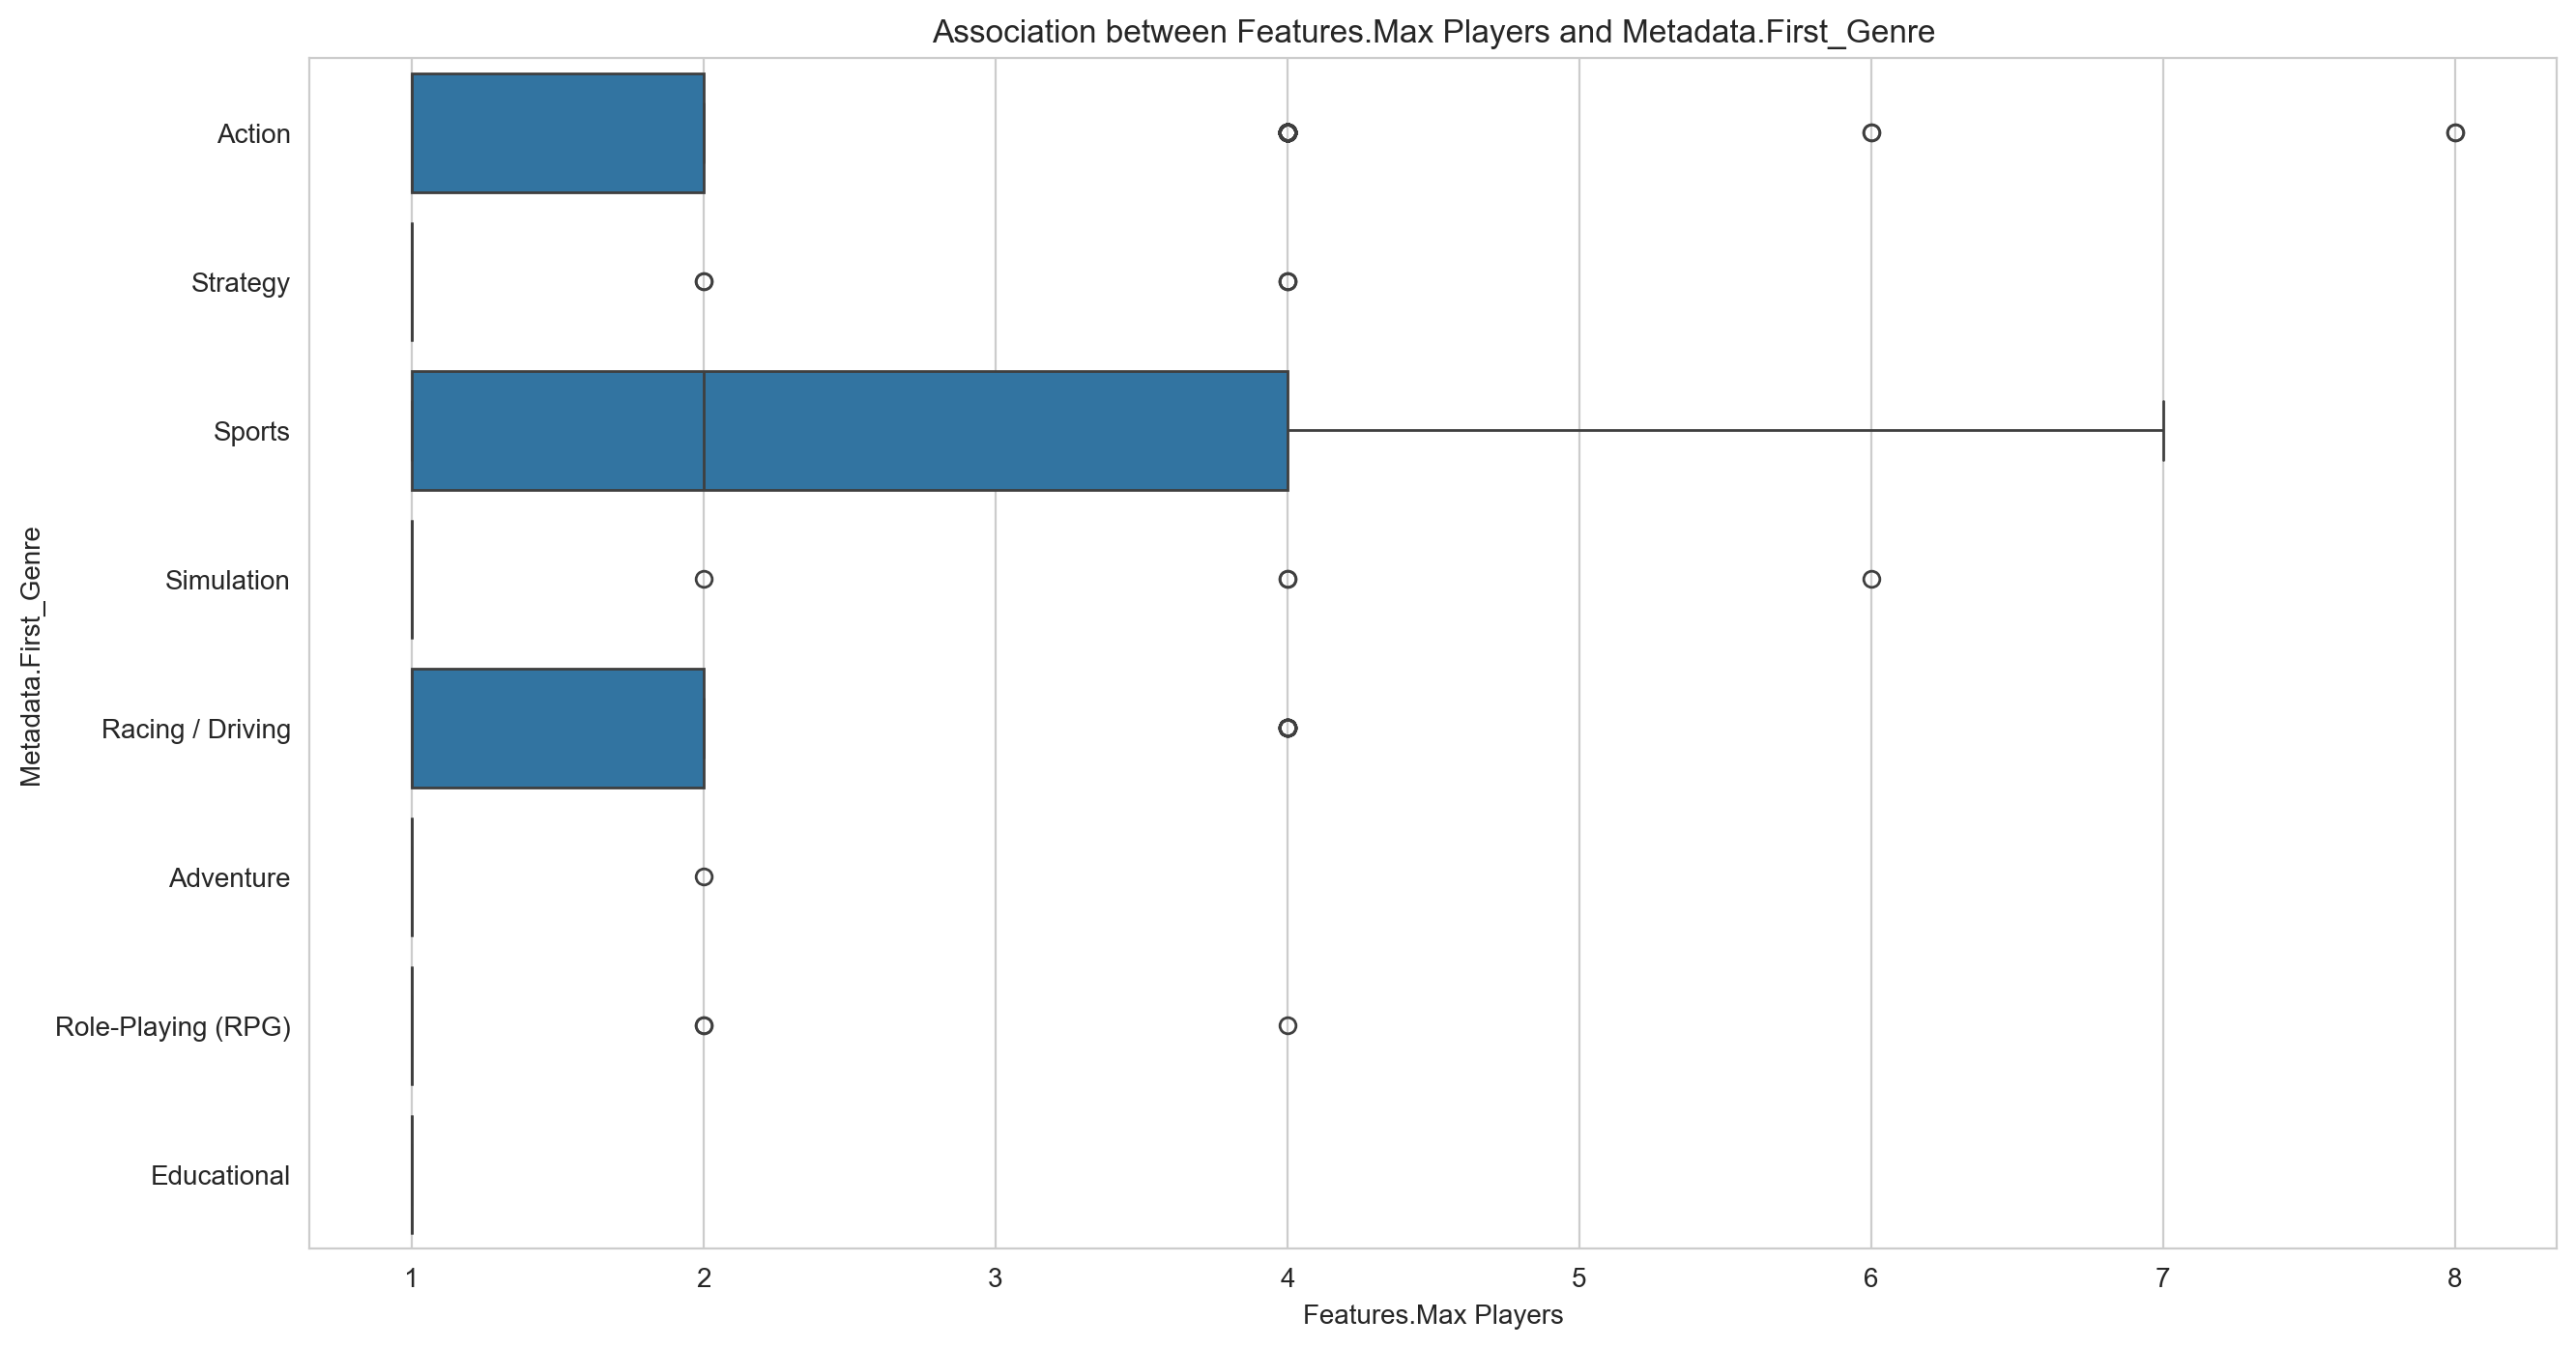

In [65]:
# Plot the association between 'Metadata.Genre' and 'Features.Max Players'
df['Metadata.First_Genre'] = df['Metadata.Genres'].str.split(',').str[0] # Extract the first genre from the 'Metadata.Genres' column
plot_association('Features.Max Players', 'Metadata.First_Genre', df, type='cat')
df.drop(columns=['Metadata.First_Genre'], inplace=True)

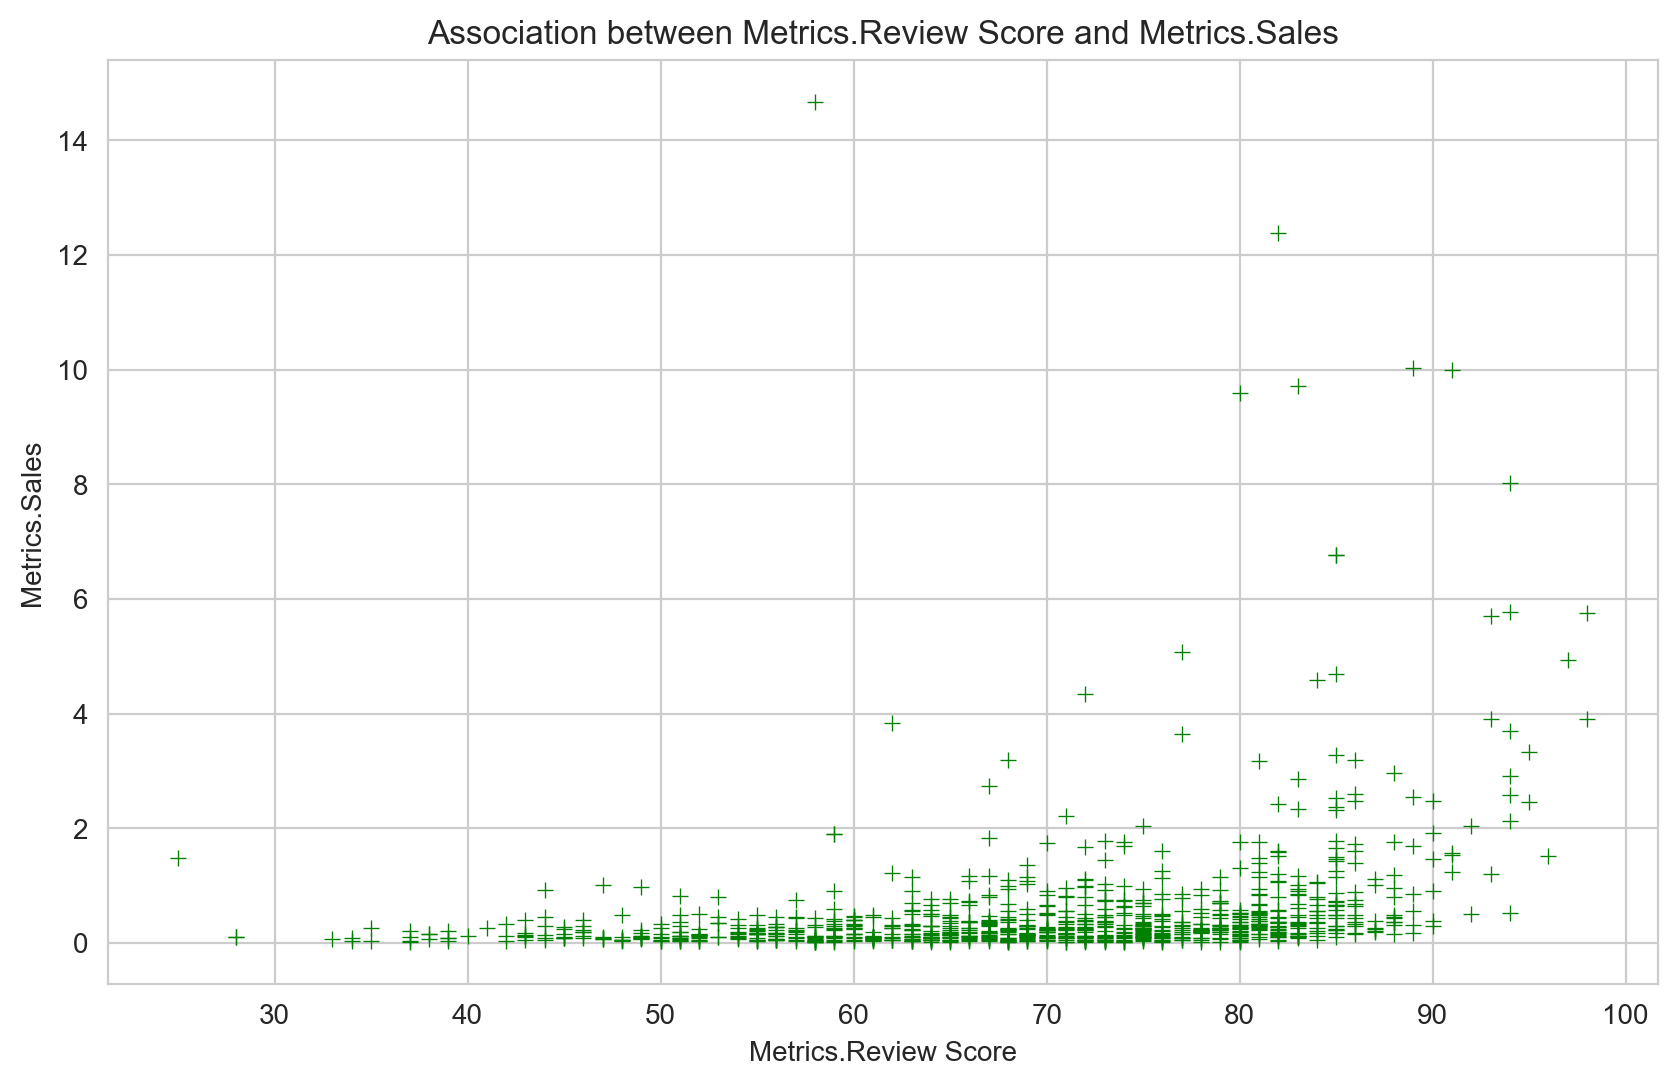

In [66]:
# Explore the association between 'Metrics.Review Score' and 'Metrics.Sales'
plot_association('Metrics.Review Score', 'Metrics.Sales', df)